In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style("whitegrid")


In [ ]:
sales = pd.read_csv('/content/sales.csv')
vendor_invoice = pd.read_csv('/content/vendor_invoice.csv')
purchases = pd.read_csv('/content/purchases.csv')
purchase_prices = pd.read_csv('/content/purchase_prices.csv')
begin_inventory = pd.read_csv('/content/begin_inventory.csv')
end_inventory = pd.read_csv('/content/end_inventory.csv')


In [ ]:
sales.head()


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546.0,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY


In [ ]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254379 entries, 0 to 254378
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InventoryId     254379 non-null  object 
 1   Store           254379 non-null  int64  
 2   Brand           254379 non-null  int64  
 3   Description     254379 non-null  object 
 4   Size            254379 non-null  object 
 5   SalesQuantity   254379 non-null  int64  
 6   SalesDollars    254379 non-null  float64
 7   SalesPrice      254379 non-null  float64
 8   SalesDate       254379 non-null  object 
 9   Volume          254379 non-null  float64
 10  Classification  254379 non-null  int64  
 11  ExciseTax       254379 non-null  float64
 12  VendorNo        254378 non-null  float64
 13  VendorName      254378 non-null  object 
dtypes: float64(5), int64(4), object(5)
memory usage: 27.2+ MB


In [ ]:
purchases.head()


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124.0,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6.0,214.26,1.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4.0,37.40,1.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5.0,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6.0,56.10,1.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169.0,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5.0,106.60,1.0


In [ ]:
for df in [sales, purchases, purchase_prices, begin_inventory, end_inventory, vendor_invoice]:
    df.columns = df.columns.str.strip()


In [ ]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])


In [ ]:
purchase_date_cols = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']
for col in purchase_date_cols:
    purchases[col] = pd.to_datetime(purchases[col])


In [ ]:
sales.head()


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546.0,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY


In [ ]:
purchases.head()


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124.0,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6.0,214.26,1.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4.0,37.40,1.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5.0,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6.0,56.10,1.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169.0,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5.0,106.60,1.0


In [ ]:
sales['Revenue'] = sales['SalesQuantity'] * sales['SalesPrice']


In [ ]:
sales = sales.merge(
    purchase_prices[['Brand', 'PurchasePrice']],
    on='Brand',
    how='left'
)


In [ ]:
sales['Cost'] = sales['SalesQuantity'] * sales['PurchasePrice']
sales['Profit'] = sales['Revenue'] - sales['Cost']
sales['ProfitMargin'] = (sales['Profit'] / sales['Revenue']) * 100


In [ ]:
brand_perf = sales.groupby('Brand').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

brand_perf.sort_values('Profit').head(10)


,Brand,Revenue,Profit,ProfitMargin
1582,5287,0.49,0.11,22.448980
2329,8872,0.99,0.21,21.212121
2304,8729,0.99,0.25,25.252525
833,3065,0.99,0.28,28.282828
1275,4173,1.98,0.40,20.202020
827,3053,1.98,0.40,20.202020
2151,8282,1.98,0.56,28.282828
2036,7902,2.97,0.81,27.272727
1182,3888,3.96,0.92,23.232323
37,199,4.99,1.12,22.444890


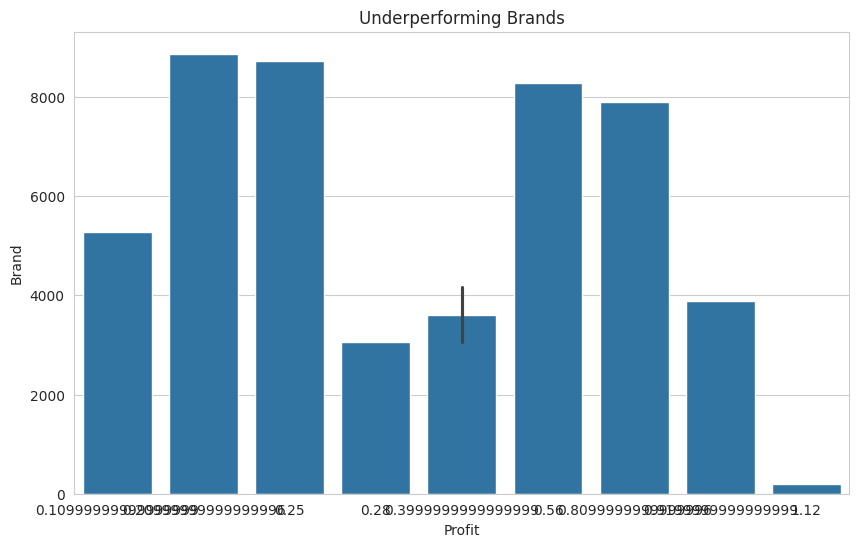

In [ ]:
sns.barplot(
    data=brand_perf.sort_values('Profit').head(10),
    x='Profit',
    y='Brand'
)
plt.title('Underperforming Brands')
plt.show()


In [ ]:
vendor_perf = sales.groupby('VendorName').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

vendor_perf.sort_values('Profit', ascending=False).head(10)


,VendorName,Revenue,Profit
20,DIAGEO NORTH AMERICA INC,1091148.78,310137.61
49,MARTIGNETTI COMPANIES,564826.15,211467.06
16,CONSTELLATION BRANDS INC,414884.54,165853.92
38,JIM BEAM BRANDS COMPANY,605731.68,162253.14
61,PERNOD RICARD USA,486729.07,141023.11
25,E & J GALLO WINERY,351822.43,128874.07
4,BACARDI USA INC,400081.85,124472.45
7,BROWN-FORMAN CORP,308595.44,91640.34
97,ULTRA BEVERAGE COMPANY LLP,271170.90,90662.06
45,M S WALKER INC,271397.97,89603.03


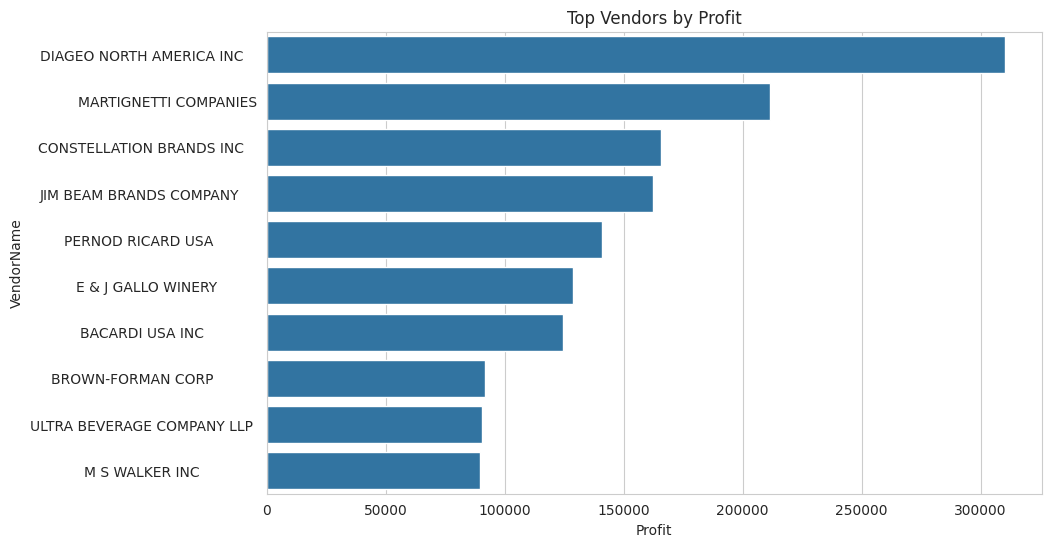

In [ ]:
sns.barplot(
    data=vendor_perf.sort_values('Profit', ascending=False).head(10),
    x='Profit',
    y='VendorName'
)
plt.title('Top Vendors by Profit')
plt.show()


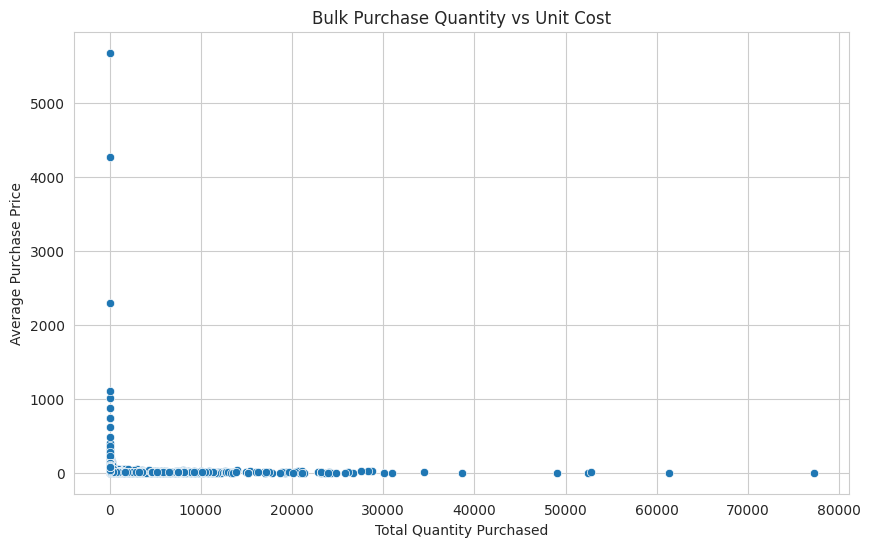

In [ ]:
bulk_purchase = purchases.groupby('Brand').agg({
    'Quantity': 'sum',
    'PurchasePrice': 'mean'
}).reset_index()

sns.scatterplot(
    data=bulk_purchase,
    x='Quantity',
    y='PurchasePrice'
)
plt.title('Bulk Purchase Quantity vs Unit Cost')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Average Purchase Price')
plt.show()


In [ ]:
begin_inventory.columns


Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')

In [ ]:
end_inventory.columns


Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')

In [ ]:
inventory = begin_inventory.merge(
    end_inventory,
    on=['InventoryId', 'Store', 'Brand'],
    suffixes=('_begin', '_end')
)


In [ ]:
inventory['AverageInventory'] = (
    inventory['onHand_begin'] + inventory['onHand_end']
) / 2


In [ ]:
sales_qty = sales.groupby('Brand')['SalesQuantity'].sum().reset_index()


In [ ]:
inventory_turnover = sales_qty.merge(
    inventory[['Brand', 'AverageInventory']],
    on='Brand',
    how='left'
)


In [ ]:
inventory_turnover['InventoryTurnover'] = (
    inventory_turnover['SalesQuantity'] /
    inventory_turnover['AverageInventory']
)


In [ ]:
inventory_turnover.sort_values('InventoryTurnover').head(10)


,Brand,SalesQuantity,AverageInventory,InventoryTurnover
9796,1505,1,177.0,0.005650
9795,1505,1,163.5,0.006116
9794,1505,1,127.5,0.007843
9793,1505,1,107.5,0.009302
36438,3564,1,91.5,0.010929
120010,18743,1,84.0,0.011905
123108,19866,1,77.5,0.012903
166270,45871,1,72.5,0.013793
124204,20515,1,71.0,0.014085
131826,24755,1,71.0,0.014085


STEP 5: VENDOR SCORECARD (CORE BUSINESS OUTPUT)

In [40]:
sales.columns


Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName', 'Revenue', 'PurchasePrice',
       'Cost', 'Profit', 'ProfitMargin'],
      dtype='object')

In [41]:
vendor_scorecard = sales.groupby(
    'VendorName'
).agg(
    Total_Sales_Qty=('SalesQuantity', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit_Margin=('ProfitMargin', 'mean')
).reset_index()


In [42]:
vendor_scorecard.head()


,VendorName,Total_Sales_Qty,Total_Revenue,Total_Profit,Avg_Profit_Margin
0,ALTAMAR BRANDS LLC,7,134.93,37.01,25.431201
1,AMERICAN VINTAGE BEVERAGE,136,1766.64,491.56,27.829099
2,APPOLO VINEYARDS LLC,1,15.49,5.02,32.408005
3,ATLANTIC IMPORTING COMPANY,32,983.68,256.36,26.309520
4,BACARDI USA INC,26135,400081.85,124472.45,32.221262


In [43]:
vendor_scorecard['Profit_Rank'] = vendor_scorecard['Total_Profit'].rank(ascending=False)


In [44]:
vendor_scorecard.sort_values('Profit_Rank').head(10)


,VendorName,Total_Sales_Qty,Total_Revenue,Total_Profit,Avg_Profit_Margin,Profit_Rank
20,DIAGEO NORTH AMERICA INC,107542,1091148.78,310137.61,27.581642,1.0
49,MARTIGNETTI COMPANIES,35639,564826.15,211467.06,38.755072,2.0
16,CONSTELLATION BRANDS INC,38394,414884.54,165853.92,39.564204,3.0
38,JIM BEAM BRANDS COMPANY,52712,605731.68,162253.14,26.686604,4.0
61,PERNOD RICARD USA,24683,486729.07,141023.11,29.136004,5.0
25,E & J GALLO WINERY,33651,351822.43,128874.07,36.562924,6.0
4,BACARDI USA INC,26135,400081.85,124472.45,32.221262,7.0
7,BROWN-FORMAN CORP,18006,308595.44,91640.34,29.038476,8.0
97,ULTRA BEVERAGE COMPANY LLP,17240,271170.90,90662.06,34.114495,9.0
45,M S WALKER INC,25375,271397.97,89603.03,33.359734,10.0


🧩 STEP 6: VENDOR SEGMENTATION (HIGH / MEDIUM / LOW)

In [45]:
vendor_scorecard['Total_Profit'].describe()


,Total_Profit
count,109.000000
mean,21467.092110
std,47966.379179
min,2.450000
25%,188.660000
50%,918.090000
75%,20708.860000
max,310137.610000


In [46]:
low_cut = vendor_scorecard['Total_Profit'].quantile(0.30)
high_cut = vendor_scorecard['Total_Profit'].quantile(0.70)


In [47]:
def segment_vendor(profit):
    if profit >= high_cut:
        return 'High Performing'
    elif profit >= low_cut:
        return 'Medium Performing'
    else:
        return 'Low Performing'

vendor_scorecard['Vendor_Category'] = vendor_scorecard['Total_Profit'].apply(segment_vendor)


In [48]:
vendor_scorecard['Vendor_Category'].value_counts()


,count
Vendor_Category,
Medium Performing,43
Low Performing,33
High Performing,33


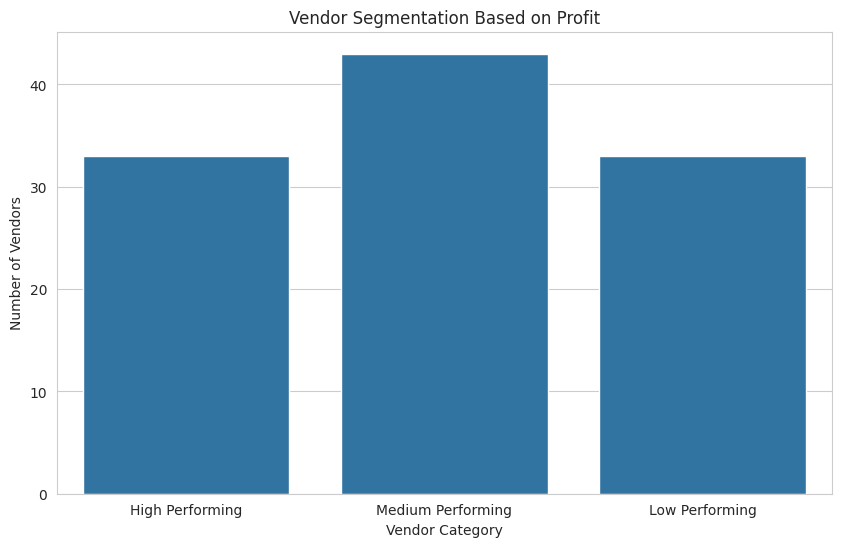

In [49]:
sns.countplot(
    data=vendor_scorecard,
    x='Vendor_Category',
    order=['High Performing', 'Medium Performing', 'Low Performing']
)
plt.title('Vendor Segmentation Based on Profit')
plt.xlabel('Vendor Category')
plt.ylabel('Number of Vendors')
plt.show()


📊 STEP 7: MANAGEMENT INSIGHTS

In [50]:
vendor_scorecard.sort_values('Total_Profit', ascending=False).head(10)


,VendorName,Total_Sales_Qty,Total_Revenue,Total_Profit,Avg_Profit_Margin,Profit_Rank,Vendor_Category
20,DIAGEO NORTH AMERICA INC,107542,1091148.78,310137.61,27.581642,1.0,High Performing
49,MARTIGNETTI COMPANIES,35639,564826.15,211467.06,38.755072,2.0,High Performing
16,CONSTELLATION BRANDS INC,38394,414884.54,165853.92,39.564204,3.0,High Performing
38,JIM BEAM BRANDS COMPANY,52712,605731.68,162253.14,26.686604,4.0,High Performing
61,PERNOD RICARD USA,24683,486729.07,141023.11,29.136004,5.0,High Performing
25,E & J GALLO WINERY,33651,351822.43,128874.07,36.562924,6.0,High Performing
4,BACARDI USA INC,26135,400081.85,124472.45,32.221262,7.0,High Performing
7,BROWN-FORMAN CORP,18006,308595.44,91640.34,29.038476,8.0,High Performing
97,ULTRA BEVERAGE COMPANY LLP,17240,271170.90,90662.06,34.114495,9.0,High Performing
45,M S WALKER INC,25375,271397.97,89603.03,33.359734,10.0,High Performing


In [51]:
vendor_scorecard.sort_values('Total_Profit').head(10)


,VendorName,Total_Sales_Qty,Total_Revenue,Total_Profit,Avg_Profit_Margin,Profit_Rank,Vendor_Category
78,SILVER MOUNTAIN CIDERS,1,6.99,2.45,35.050072,109.0,Low Performing
2,APPOLO VINEYARDS LLC,1,15.49,5.02,32.408005,108.0,Low Performing
59,PARK STREET IMPORTS LLC,2,36.48,8.33,22.781078,107.0,Low Performing
47,MANGO BOTTLING INC,7,69.93,17.93,26.206206,106.0,Low Performing
28,FANTASY FINE WINES CORP,10,79.90,26.30,32.916145,105.0,Low Performing
53,MILTONS DISTRIBUTING CO,12,95.88,31.92,33.291615,104.0,Low Performing
12,CAPSTONE INTERNATIONAL,6,113.94,31.98,28.067404,103.0,Low Performing
14,CENTEUR IMPORTS LLC,8,101.92,33.26,33.043938,102.0,Low Performing
0,ALTAMAR BRANDS LLC,7,134.93,37.01,25.431201,101.0,Low Performing
87,SWEETWATER FARM,6,155.94,39.54,25.355906,100.0,Low Performing


STEP 8: FINAL KPI SUMMARY (FOR DASHBOARD)

In [52]:
total_revenue = vendor_scorecard['Total_Revenue'].sum()
total_profit = vendor_scorecard['Total_Profit'].sum()
total_vendors = vendor_scorecard.shape[0]

print("Total Revenue:", total_revenue)
print("Total Profit:", total_profit)
print("Total Vendors:", total_vendors)


Total Revenue: 7184251.2700000005
Total Profit: 2339913.0400000005
Total Vendors: 109


In [53]:
vendor_scorecard.to_csv('vendor_scorecard_final.csv', index=False)
inventory_turnover.to_csv('inventory_turnover_final.csv', index=False)
brand_perf.to_csv('brand_performance_final.csv', index=False)
